In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [28]:
sizeH = 2
sizeW = 2
baseArray = np.ones((sizeH*2+1,sizeW*2+1),dtype=int)

In [29]:
print(baseArray)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [141]:
### Create the path

def randomPath(maxTime,minTimePP,maxTimePP,sizeH,sizeW,flightAltitude,posArrayInitial):
    time_array = np.array([],dtype=np.int16)
    flagTime = False
    
    while not flagTime:
        num = int(random.uniform(minTimePP,maxTimePP))
        if time_array.sum()+num >= maxTime:
            flagTime = True 
        else:
            time_array = np.append(time_array,num)

    baseArray_path = np.ones((sizeH*2+1,sizeW*2+1))
    flagIdx = False
    pathArray = []
    cont = 0
    x_idx = posArrayInitial[0]
    y_idx = posArrayInitial[1]
    pathArray.append([x_idx-sizeW,y_idx-sizeH,flightAltitude])
    baseArray_path[x_idx,y_idx] = 0

    while not np.all(baseArray_path == 0) and cont < time_array.shape[0]-1:
        while not flagIdx:
            x_idx = random.randint(0,sizeH*2)
            y_idx = random.randint(0,sizeH*2)
            if baseArray_path[x_idx,y_idx] == 1 and x_idx-sizeW != pathArray[cont][0] and y_idx-sizeH != pathArray[cont][1]:
                flagIdx = True
                pathArray.append([x_idx-sizeW,y_idx-sizeH,flightAltitude])
                baseArray_path[x_idx,y_idx] = 0
            else:
                continue
        flagIdx = False
        cont+=1
    return baseArray_path,np.array(pathArray),time_array

mapa,path,time = randomPath(700,40,80,2,2,1,[0,0])

In [142]:
print(mapa)

[[0. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1.]]


In [143]:
print(path)

[[-2 -2  1]
 [ 1 -1  1]
 [ 0  2  1]
 [ 2 -1  1]
 [ 1  2  1]
 [-2 -1  1]
 [ 1  1  1]
 [ 2 -2  1]
 [-1 -1  1]
 [ 2  1  1]
 [ 1  0  1]]


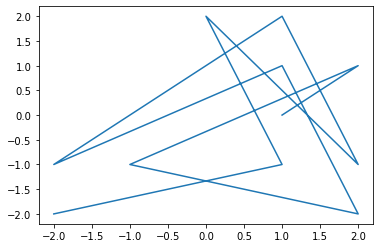

In [144]:
plt.plot(path[:,0],path[:,1])
plt.show()

In [112]:
def cal_Total_Distance(pathArray):
    distance_Total = 0
    distance_Array = np.zeros(pathArray.shape[0])
    for i in range(1,pathArray.shape[0]):
        distance_Array[i-1] = np.linalg.norm(pathArray[i-1]-pathArray[i])
    distance_Total = distance_Array.sum()
        
    return distance_Total,distance_Array

def cal_Total_Turns(pathArray):
    total_Turns = 0
    flag_turn = np.zeros(pathArray.shape[0]-1)
    for i in range(1,pathArray.shape[0]-1):
        dot_val = np.dot(pathArray[i-1]-pathArray[i],pathArray[i+1]-pathArray[i])
        mag_A = np.linalg.norm(pathArray[i-1]-pathArray[i])
        mag_B = np.linalg.norm(pathArray[i+1]-pathArray[i])
        fracc = dot_val/(np.dot(mag_A,mag_B)+1E-9)
        #print(fracc)
        flag = math.acos(fracc)
        flag_turn[i-1] = flag
        if flag != 0.0:
            total_Turns+=1
    return total_Turns

In [146]:
turns = cal_Total_Turns(path)
print(turns)

9


In [120]:
def changeToTxt(pathArr,timeArr,idx):
    time = ''
    path = ''
    for i in timeArr:
        time =  time + str(i) + ','

    for i in pathArr:
        path = path + str(i) + ';'

    final = str(idx)+'|'+path+'|'+time
    final = final[:-1]
    return final

In [140]:
##### Windows
file_path = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/OctavoSemestre/ProblemaEspecial/ML/path/"
file = open(file_path + 'path_v9.txt',mode="w")
file_pd = open(file_path + 'distanceTurn_v9.csv',mode="w")

file_pd.close()
numRoad = 500
disTotalArray = np.zeros((numRoad,1))
totalTurnsArray = np.zeros((numRoad,1))
sizeGrid = 2

for i in range(numRoad):
    if i == 0:
        _,path,time = randomPath(700,40,70,sizeGrid,sizeGrid,1,[0,0])
        #disTotal,disArray = cal_Total_Distance(path)
        total_turns = cal_Total_Turns(path)
    else:
        _,path,time = randomPath(700,40,70,sizeGrid,sizeGrid,1,path[-1,:]+sizeGrid)
        #disTotal,disArray = cal_Total_Distance(path)
        total_turns = cal_Total_Turns(path)

    #disTotalArray[i,0] = disTotal
    totalTurnsArray[i,0] = total_turns

    path = path.astype(int)
    final = ''
    final = changeToTxt(path,time,i+1)
    file.write('\n')
    file.write(final)

file.close()

#d = {'disTotal':disTotalArray.reshape(-1),'totalTurns':totalTurnsArray.reshape(-1)}
d = {'totalTurns':totalTurnsArray.reshape(-1)}
pd_values = pd.DataFrame(data=d)
pd_values.to_csv(file_path + 'distanceTurn_v9.csv',index=False)